In [47]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('D:/DS/analytics_edge/quality.csv')

In [4]:
pandas_profiling.ProfileReport(df)

Number of variables,14
Number of observations,131
Total Missing (%),0.0%
Total size in memory,13.5 KiB
Average record size in memory,105.6 B
Numeric,12
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,0


In [20]:
df.groupby('PoorCare').count()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall
PoorCare,,,,,,,,,,,,,
0,98,98,98,98,98,98,98,98,98,98,98,98,98
1,33,33,33,33,33,33,33,33,33,33,33,33,33


Majority (98) received good care. Hence it is the baseline. Baseline model accuracy = 98/131 = 0.7480.

Logistic Regression model will try to beat this score.

In [34]:
df_train, df_test = train_test_split(df, test_size = 0.25, random_state = 88)

In [35]:
df_train.shape

(98, 14)

In [36]:
df_test.shape

(33, 14)

Office Visits, Narcotics -> Independant Variable

PoorCare -> Dependant Variable

In [50]:
logreg = sm.logit(formula = 'PoorCare ~ Narcotics+OfficeVisits', data = df).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.444464
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               PoorCare   No. Observations:                  131
Model:                          Logit   Df Residuals:                      128
Method:                           MLE   Df Model:                            2
Date:                Sun, 30 Jun 2019   Pseudo R-squ.:                  0.2125
Time:                        12:20:36   Log-Likelihood:                -58.225
converged:                       True   LL-Null:                       -73.939
                                        LLR p-value:                 1.497e-07
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.5402      0.450     -5.644      0.000      -3.422      -1.658
Narcotics        0.1099      0.033      3.368      0.001       0.046       0.174
OfficeVisits     0.0627      0.024      2.615      0.009       0.016       0.110
================================================================================
"""

In [37]:
X = pd.DataFrame(df['OfficeVisits'])

In [38]:
X['Narcotics'] = df['Narcotics']

In [39]:
X.head()

,OfficeVisits,Narcotics
0,18,1
1,6,1
2,5,3
3,19,0
4,19,3


In [40]:
y = pd.DataFrame(df['PoorCare'])

In [41]:
y.head()

,PoorCare
0,0
1,0
2,0
3,0
4,0


In [42]:
X.shape

(131, 2)

In [43]:
y.shape

(131, 1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 88)

In [52]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


Hence, this score is better than the score of the baseline model of 0.748

In [55]:
y_pred.mean()

0.09090909090909091

Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[24  0]
 [ 6  3]]


* True Negative: 25
* True Positive: 3
* False Negative: 6
* False Positive: 0

In [59]:
sensitivity = 3/(3+6)
specificity = 25/(25+0)
print(sensitivity)
print(specificity)

0.3333333333333333
1.0


High threshold value -> Low Sensitivity and High Specificity

Low threshold value -> High Sensitivity and Low Specificity

### ROC Curves


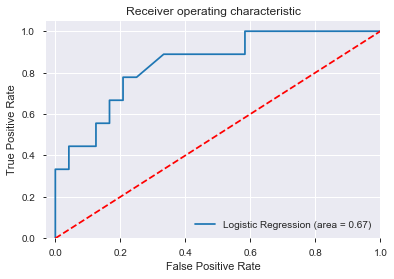

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()